# Analyzing Programming Language of the Year Awards (2003-2022)

In this Jupyter Notebook, we will analyze a dataset that records the "Programming Language of the Year" awards from 2003 to 2022. The dataset contains information about which programming language received this prestigious award each year. Our goal is to gain insights into the trends and popularity of programming languages over this timespan.

## Dataset Description

The dataset includes the following columns:
- `Year`: The year in which the award was given.
- `Winner`: The programming language that received the "Programming Language of the Year" award for that year.

Let's start by loading the data and exploring the most awarded programming languages.


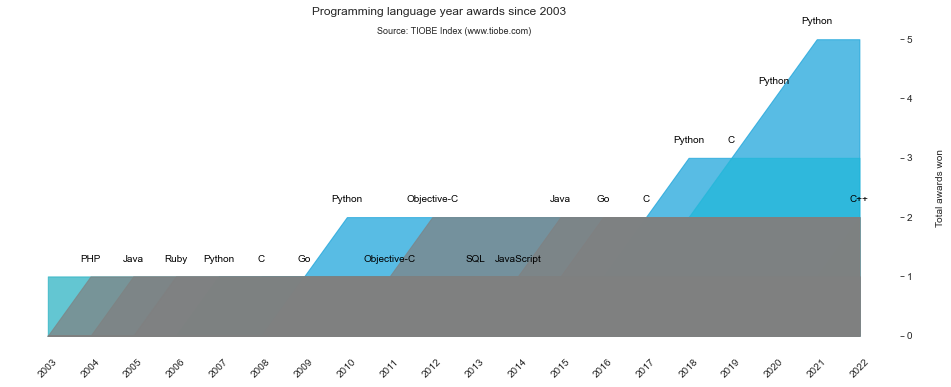

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('data/tiobe_index_prog_language_of_the_year.csv')

# Create a cumulative count of prizes won for each language starting from 2003
cumulative_counts = df.pivot_table(index='Year', columns='Winner', aggfunc='size', fill_value=0).sort_index(ascending=True).cumsum()

# Set Seaborn style
sns.set_style("whitegrid", {'axes.grid': False})

# Create a wider figure and axis for the stacked area plot
fig, ax = plt.subplots(figsize=(16, 6))

# Define colors for the top 3 languages and grey for others
top_3_languages = cumulative_counts.iloc[-1].nlargest(3).index.tolist()
colors = {
    top_3_languages[0]: "#11A0D9",
    top_3_languages[1]: "#1EB7D9",
    top_3_languages[2]: "#21AFBF",
}

# Create a stacked area plot for the top 3 languages
for language in top_3_languages:
    ax.fill_between(cumulative_counts.index, cumulative_counts[language], label=language, color=colors[language], alpha=0.7)

# Create a stacked area plot for "Other" languages individually (in grey)
other_languages = [language for language in cumulative_counts.columns if language not in top_3_languages]
for language in other_languages:
    ax.fill_between(cumulative_counts.index, cumulative_counts[language], label=language, color='grey', alpha=0.7)

ax.set_title('Source: TIOBE Index (www.tiobe.com)', pad=-10, size=9)
ax.set_xlabel('')
ax.set_ylabel('Total awards won')  # Remove y-label

# Format years as integers on the x-axis and show each year
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(2003, 2023, 1), fontsize=10)
plt.xticks(rotation=45)
ax.yaxis.tick_right()  # Move y-axis labels to the right side
ax.yaxis.set_label_coords(1.05, 0.5)  # Adjust the position of the y-axis label

# Detect and handle label overlaps with more offset
for year in cumulative_counts.index:
    if year in cumulative_counts.index:
        winners = [language for language in cumulative_counts.columns if year - 1 in cumulative_counts.index and cumulative_counts[language][year] > cumulative_counts[language][year - 1]]
        if winners:
            if len(winners) > 1:
                ax.annotate(winners[0], (year, cumulative_counts[winners[0]][year]), textcoords="offset points", xytext=(0,30), ha='center', fontsize=10, color='black')
                ax.annotate(winners[1], (year, cumulative_counts[winners[1]][year]), textcoords="offset points", xytext=(0,-30), ha='center', fontsize=10, color='black')
            else:
                ax.annotate(winners[0], (year, cumulative_counts[winners[0]][year]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=10, color='black')

# Add a subtitle referring to the source
#fig.suptitle('Source: TIOBE Index (www.tiobe.com)', x=0.5, y=0.95, ha='center', fontsize=10)
fig.suptitle('Programming language year awards since 2003', x=0.5, y=0.92, ha='center', fontsize=12)
# Remove borders (spines)
sns.despine(left=True, bottom=True, right=True, top=True)

# Show the plot
plt.show()



## Insights from the Dataset

### Python Dominance (2010-2022)
Python has been the most awarded programming language of the year since 2010, with a consistent upward trend in recognition. Its adaptability, readability, and extensive libraries have contributed to its continued popularity.

### Diverse Winners (2003-2009)
Prior to Python's dominance, the award was distributed among various programming languages, including C, Java, Ruby, and PHP. This period showcased a diverse range of languages receiving recognition.

### Emergence of New Languages
Notably, the emergence of newer languages like Go and JavaScript as award winners in recent years demonstrates the dynamism of the programming landscape. These languages have gained recognition for their contributions to web development, concurrency, and performance.

### C's Lasting Influence (2003-2022)
C has maintained its relevance as a recognized language throughout the years, albeit with less frequent awards. Its historical significance in systems programming and its continued use in various domains have ensured its presence on the list of award winners.

### Objective-C's Recognition (2011-2012)
Objective-C gained recognition in 2011 and 2012, largely attributed to its use in iOS app development. Its recognition underscores the impact of mobile app development during this period.

### The Influence of Community and Use Cases
The recognition of a language often reflects its contributions to specific domains or its strong community support. Languages that excel in particular use cases or industries tend to receive recognition in the "Programming Language of the Year" awards.

## Conclusion

In this analysis of "Programming Language of the Year" awards spanning from 2003 to 2022, several key insights emerge, highlighting the evolving trends in programming language recognition.

Python's consistent dominance from 2010 onwards reflects its versatility and widespread adoption in various fields, including web development, data science, and machine learning. Prior to Python's ascent, the awards were distributed among a diverse set of languages, showcasing the dynamism of the programming landscape.

The recognition of newer languages like Go and JavaScript underscores the ever-changing nature of the industry, as these languages gained prominence for their contributions to emerging technologies.

While Python has been the most recognized language in recent years, established languages like C continue to receive acknowledgment, emphasizing their enduring influence.

The historical significance of Objective-C in iOS app development demonstrates how specific use cases can impact a language's recognition.

Ultimately, the "Programming Language of the Year" awards provide valuable insights into the evolving preferences and contributions of programming languages within the developer community.
``
